# Q1 NoteBook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import sklearn.utils as utils

#classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn import cross_validation
from sklearn.cross_validation import KFold

%matplotlib inline

# NMIST dataset: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits

In [2]:
#mnist = fetch_mldata("MNIST original")
digits = datasets.load_digits()
X_digits, y_digits = digits.data, digits.target

print X_digits.shape, y_digits.shape,  y_digits, digits.target_names
X_digits, y_digits = utils.shuffle(X_digits, y_digits)
print  y_digits

(1797, 64) (1797,) [0 1 2 ..., 8 9 8] [0 1 2 3 4 5 6 7 8 9]
[8 6 5 ..., 7 1 2]


For each posible value of k we execure a SVD from 1 to the rank of the data. Each new matrix is used for a KFold cross validation. The scores of each Fold are saved in a scoresKFold vector. Final Score is assumed as themean of those values. For each quantity of eigenvectors on data rank, the value of the KFold is saved in a list and finally saved in a dictionary.

We define a error treshold in order to calculate the max number of eigenvalues that can be ignores. This value is decided according to the percentage of the score over the full rank score. A treshold of 90% of the full rank score is took. However, it's interesting to notice that for each k, the number of eigenvalues hat cn be ignored is almost the same for every value of this treshold.

59
0.909842154132
59
0.902604456825
59
0.928206437635
59
0.919312906221


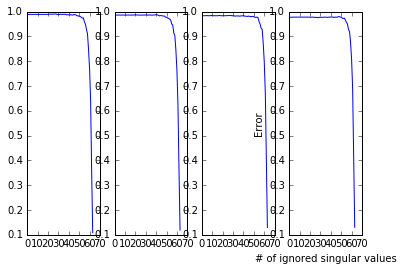

In [5]:
k_list=[1,2,5,10]
ind=0
fig, axs = plt.subplots(1,4)
scores={}
for k in k_list:
    U, s, V = np.linalg.svd(X_digits)
    errors = np.zeros(64)
    scoresSVD=list()
    for i in range(64):
        s[-1:-(i+1):-1]=np.zeros(i)
        S = np.diag(s[0:64])
        S = np.vstack([S, np.zeros((1797-64,64)) ])
        approx_d = np.dot(U, np.dot(S,V))
        
        knn_digits = KNeighborsClassifier(n_neighbors=k)
        k_fold = cross_validation.KFold(len(approx_d), 5)
        scoresKFold = list()
        for kk, (train, test) in enumerate(k_fold):
            knn_digits.fit(approx_d[train], y_digits[train])
            scoresKFold.append(knn_digits.score(approx_d[test], y_digits[test]))
           
        scoresSVD.append(np.mean(scoresKFold))
    
    scores[k]=scoresSVD
    #print scoresSVD  
  
    axs[ind].plot(scoresSVD)
    ind+=1
    
    
plt.ylabel('Error')
plt.xlabel('# of ignored singular values')
    

In [11]:
for key, value in scores.iteritems():
    init_error=value[0]
    tresh=init_error*0.99
    index= next(x[0] for x in enumerate(value) if x[1] < tresh )
    print "For k=%s and ignoring %s singular values we get an score of %s" %(key,index,value[index-1])
    print 

For k=1 and ignoring 52 singular values we get an score of 0.981072423398

For k=2 and ignoring 51 singular values we get an score of 0.977169606933

For k=10 and ignoring 54 singular values we get an score of 0.973837821108

For k=5 and ignoring 55 singular values we get an score of 0.975506035283



In order to compare the scores, for each value of ignores singular values is calculated the K with better score. A winners vector is creted with each of those K's. The mode of this vector is choose as the best K for this model.

In [6]:
winners=[]
for j in range(len(scoresSVD)):
    maxV=0
    maxK=0
    for key, value in scores.iteritems():
        if value[j]>maxV:
            maxV=value[j]
            maxK=key
    winners.append(maxK)
print winners
counts = np.bincount(winners)
print "Best K is %s" % (np.argmax(counts))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 10, 5, 5, 10, 10, 10, 10, 10]
Best K is 1


In [23]:
# Code for setting the style of the notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("../theme/custom.css", "r").read()
    return HTML(styles)
css_styling()

IOError: [Errno 2] No such file or directory: '../theme/custom.css'